<a href="https://colab.research.google.com/github/Gauvvv/OpenclassroomsProject/blob/main/Projet_5_Saqo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b style="font-weight: bold; font-size:30px">Préambule </b>

# - Importation des librairies & des variables d'aides

In [ ]:
# But du code : Importer les principales librairies pour réutiliser des fonctionnalités de ces librairies.
# 1-1- Library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# 1-2- Paramétrage (optionnelle)
# warnings.simplefilter permet d'ignorer des warnings inutiles (exemple : la fonction subplots affiche un warning inutile)
import warnings
warnings.simplefilter("ignore")

# 1-3- Variables d'aides
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

# - Data Processing

## - Data loading

In [ ]:
# But du code : Importer les données.
import pandas as pd

### 2.1- Importation des données
dataset = pd.read_excel("DATABASE_PROJECT_5_VF.xlsx")
# set_index permet de dire à Python que l'identifiant de la table dataset est la colonne Loan_Id
dataset.set_index("Id", inplace=True)

dataset.head(2)

FileNotFoundError: ignored

In [ ]:
dataset.info()

NameError: ignored

## - Data splitting

In [ ]:
dataset.shape

La Database consiste de 398 lignes et 8 colonnes

La construction d'un modèle nécessite la division de notre base en deux échantillons : l’échantillon d’apprentissage et l’échantillon de test. Ce travail préalable est très important pour tester la robustesse de tout modèle statistique à porter prédictive.
La modélisation sera faite sur l’échantillon d’apprentissage. L’analyse de la performance du score sur l’échantillon test.

#### A- Division de dataset en train (db_train) et test (db_test)

In [ ]:
# But du code : Diviser la base de données en base d'apprentissage et en base de modélisation.
# Cette étape est indispensable pour construire un modèle de classification supervisé.

from sklearn.model_selection import train_test_split

db_train, db_test = train_test_split(dataset, train_size = 318,  random_state=60)

#### B- Information sur la base train et test

In [ ]:
# But du code : Information sur la base de train et la base de test.

# Base train : nombre de lignes et de colonnnes
print(color.BOLD + "Base d'apprentissage" + color.END)
print(db_train.shape)

# Base test : nombre de lignes et de colonnnes
print(color.BOLD + "\nBase de test" + color.END)
print(db_test.shape)

**Conclusion :** Il y a 318 voitures dans la base train qui sont décrits par 8 variables explicatives. La base test contient 80 clients.

# - Analyse exploratoire des données

#### A- Voiture  ́econome ayant une consommation d’au moins 30 kilomètres sur la base train

> Bloc en retrait



In [ ]:
# Voiture  ́econome ayant une consommation d’au moins 30 kilomètres sur la base train (apprentissage)
voiture_train = (db_train['Y']
           .value_counts(normalize=True)
           .reset_index())

voiture_train

,index,Y
0,0,0.77044
1,1,0.22956


22% des voitures dans le test ont une consommation inferieure à 30 kilomètres par litre de carburant et 77% sont supérieurs

#### B- Voiture  ́econome ayant une consommation d’au moins 30 kilomètres sur la base test



In [ ]:
# Voiture  ́econome ayant une consommation d’au moins 30 kilomètres sur la base train (apprentissage)
voiture_test = (db_test['Y']
                   .value_counts(normalize=True)
                   .reset_index())

voiture_train

,index,Y
0,0,0.77044
1,1,0.22956


#### C- Répresentation graphique de la variable d'intérêt entre les deux bases

Le but du code ci-dessous est de visualiser la réparition de la variable Y.
On observe la répartition des voitures ́economes ayant une consommation d’au moins 30 kilomètres(Y = 1) vs  (Y = 0).

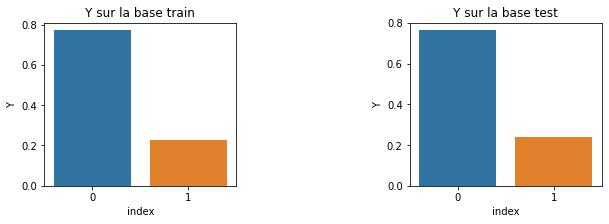

In [ ]:
plt.figure(figsize=(10, 3))

#Espace d'affichage de la première courbe
plt.subplot(1,2,1)

# Voiture  ́econome ayant une consommation d’au moins 30 kilomètres sur la base train (apprentissage)
sns.barplot(x='index', y='Y', data=voiture_train);
plt.title("Y sur la base train");

#------------------------------------------------------------------

#Espace d'affichage de la seconde courbe
plt.subplot(1,2,2)

sns.barplot(x='index', y='Y', data=voiture_test);
plt.title("Y sur la base test");

#Espace entre les deux graphiques
plt.subplots_adjust(wspace=0.9)

**Conclusion :** On remarque que seuls **22%** des Voitures ont une consommation de moins 30 kilomètres.

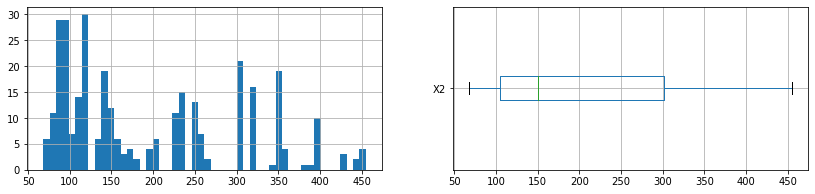

In [ ]:
plt.figure(figsize=(14,3))

plt.subplot(1,2,1)
db_train['X2'].hist(bins=50)

plt.subplot(1,2,2)
db_train.boxplot(column='X2', vert = False);

#Conclusion : des disparites au niveau des 3 POINTS réalisés avec la présence des outliers

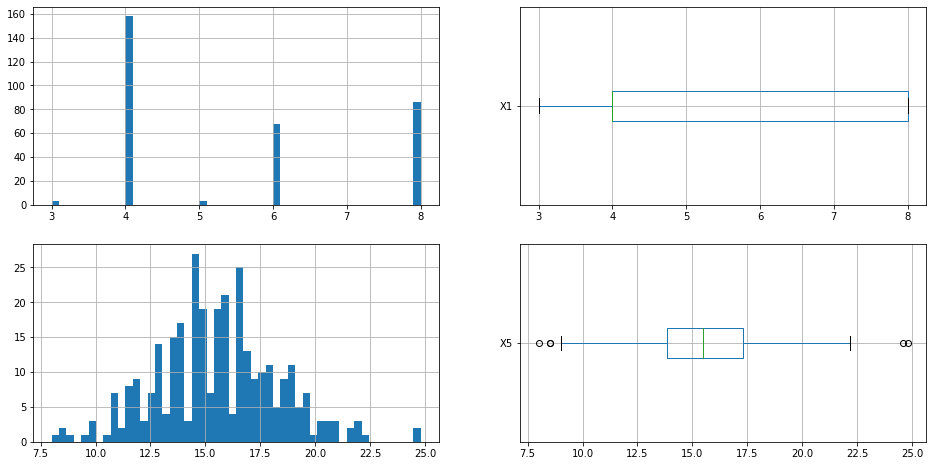

In [ ]:
#Analyse de la variable X1
plt.subplot(2,2,1)
db_train['X1'].hist(bins=50, figsize=(16, 8));

plt.subplot(2,2,2)
db_train.boxplot(column='X1', vert = False, figsize=(16, 8));


#Analyse de la variable X5.
plt.subplot(2,2,3)
db_train['X5'].hist(bins=50, figsize=(16, 8));

plt.subplot(2,2,4)
db_train.boxplot(column='X5', vert = False, figsize=(16, 8));

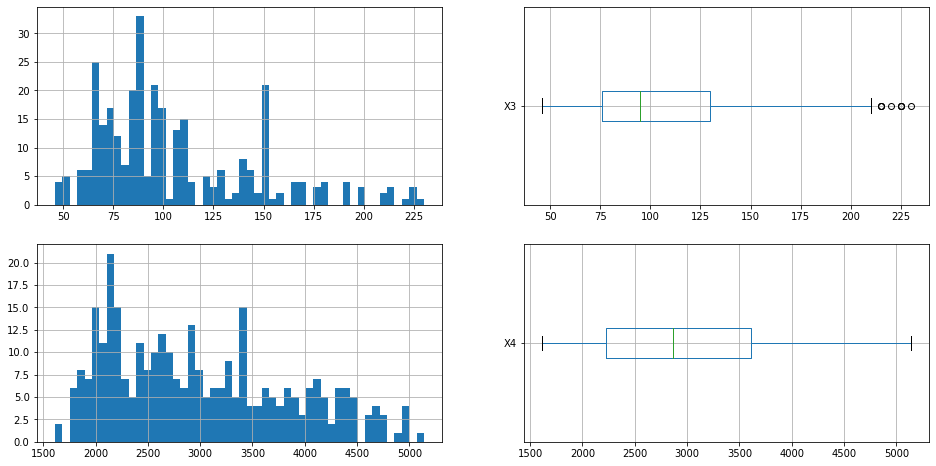

In [ ]:

#Analyse de la variable X3
plt.subplot(2,2,1)
db_train['X3'].hist(bins=50, figsize=(16, 8));

plt.subplot(2,2,2)
db_train.boxplot(column='X3', vert = False, figsize=(16, 8));


#Analyse de la variable X4.
plt.subplot(2,2,3)
db_train['X4'].hist(bins=50, figsize=(16, 8));

plt.subplot(2,2,4)
db_train.boxplot(column='X4', vert = False, figsize=(16, 8));



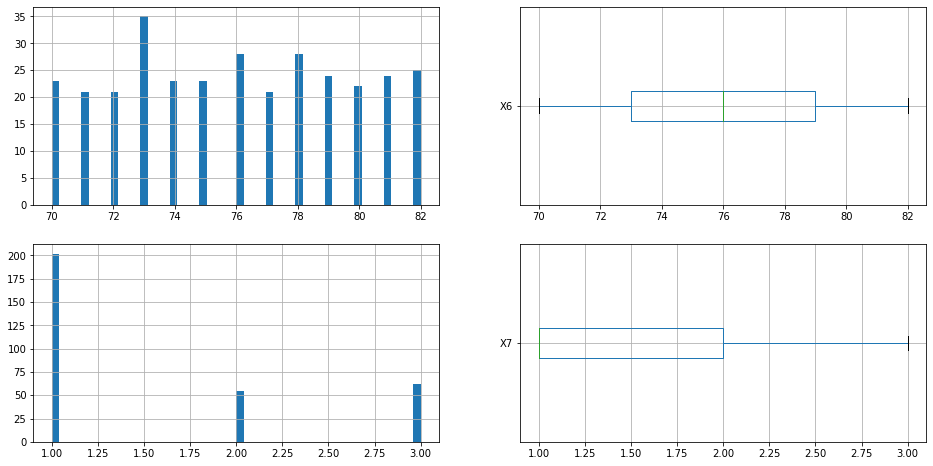

In [ ]:
#Analyse de la variable X6
plt.subplot(2,2,1)
db_train['X6'].hist(bins=50, figsize=(16, 8));

plt.subplot(2,2,2)
db_train.boxplot(column='X6', vert = False, figsize=(16, 8));


#Analyse de la variable X7.
plt.subplot(2,2,3)
db_train['X7'].hist(bins=50, figsize=(16, 8));

plt.subplot(2,2,4)
db_train.boxplot(column='X7', vert = False, figsize=(16, 8));

####Conclusion : La colonne X3 contient des outliers

### 4.7- Relation entre la distance parcourue et Voiture ayant une consommation inferieure `a 30 kilomètres

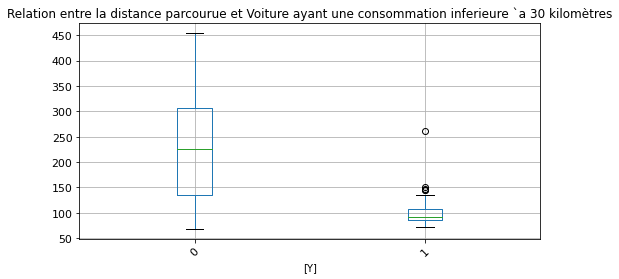

In [ ]:
# REMPLISSAGE PAR LA MOYENNE
#BOX PLOT
boxplot = db_train.boxplot(column='X2', by=['Y'], rot=45, fontsize=11, figsize=(8,4));
boxplot.set_title("Relation entre la distance parcourue et Voiture ayant une consommation inferieure `a 30 kilomètres");
plt.suptitle('')
plt.show();

Quand Y=1 on remarque que il y'a des outliers

###matrice de corrélation pour l'analyse des corrélations

In [ ]:
dataset.info()
#information sur les colones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 1 to 398
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      398 non-null    int64  
 1   X2      398 non-null    float64
 2   X3      392 non-null    float64
 3   X4      398 non-null    int64  
 4   X5      398 non-null    float64
 5   X6      398 non-null    int64  
 6   X7      398 non-null    int64  
 7   Y       398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 28.0 KB


,X1,X2,X3,X4,X5,X6,X7
Y,,,,,,,
0,5.938776,225.230612,116.243802,3252.506122,15.169796,75.093878,1.338776
1,4.068493,100.191781,69.861111,2140.164384,16.879452,79.123288,2.301370


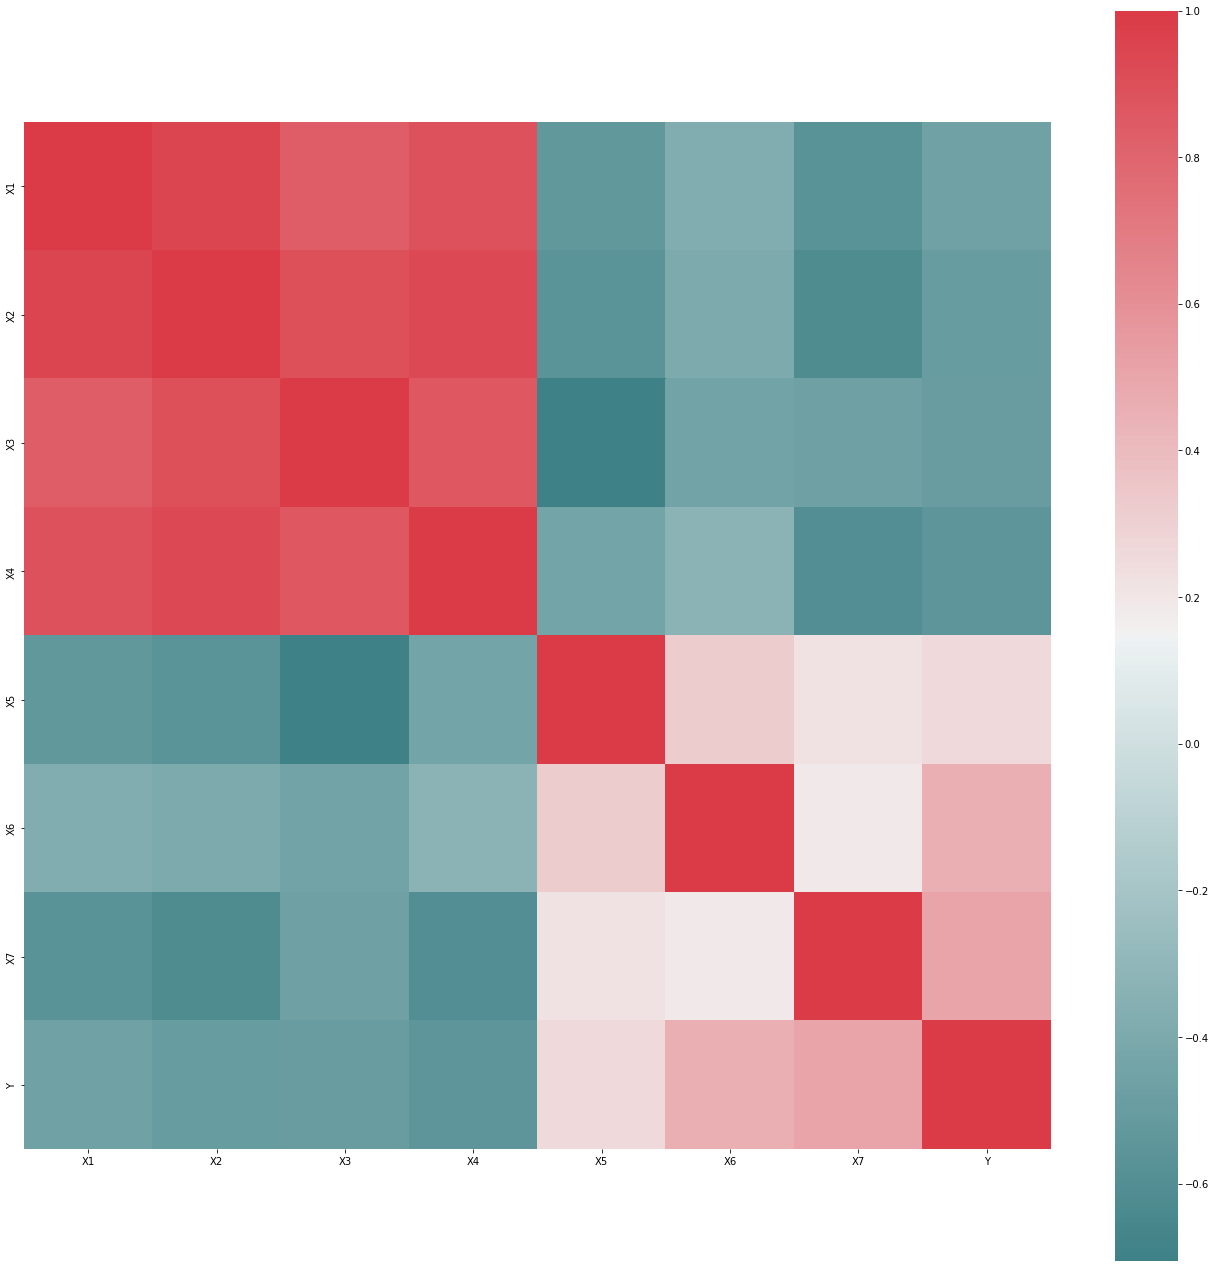

In [ ]:
corr = db_train.corr()
plt.figure(figsize=(23, 23))
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True);

pd.pivot_table(db_train, index='Y', aggfunc='mean')

Puisque  on a pas des valeurs catégoriques, on peut pas utiliser les divers types de visualisations. La rélation entres les
variables numériques est mieux expliquée par la coorelation

In [ ]:
db_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 110 to 206
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      318 non-null    int64  
 1   X2      318 non-null    float64
 2   X3      314 non-null    float64
 3   X4      318 non-null    int64  
 4   X5      318 non-null    float64
 5   X6      318 non-null    int64  
 6   X7      318 non-null    int64  
 7   Y       318 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 22.4 KB


In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(db_train, .7)
#pourcentage de corrélatin entre les variables

X3  X5   -0.705249
X1  X3    0.839508
X3  X4    0.862892
X1  X4    0.892164
X2  X3    0.898144
    X4    0.931871
X1  X2    0.947188
    X1         NaN
dtype: float64

**Conclusion :** les liens (corrélations) significatifs sont entre les variables :
* X1 et X2
* X2 et X4

In [ ]:
#Correlation with output variable
cor_target = abs(corr["Y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

X1    0.460066
X2    0.499368
X3    0.492590
X4    0.547184
X6    0.459765
X7    0.507466
Y     1.000000
Name: Y, dtype: float64

Cela represente la coorélations entre la variable Y et les autres variables qui doivent etre superior 0.3. On trouve que la coorélation entre la variable X4 et Y est le plus significatif(0.54)


In [ ]:
#Liste des colonnes de la table db_train
db_train.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y'], dtype='object')

# - Modélisation

## - Data Treatement : Missing Values

#### A- Base Train : missing values

<span style="color:red;font-weight: bolder">Question :</span> Afficher les valeurs manquantes pour chaque variable de la base train en utilisant la fonction isnull( ) et sum() de pandas.<br />
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
# But du code : Afficher les valeurs manquantes pour chaque variable en utilisant la fonction isnull( ) et sum() de pandas

db_train_na = db_train.isnull().sum()

print(db_train_na.sort_values(ascending=False))

del db_train_na

NameError: ignored

#### B- Base Train : Remplissage des valeurs manquantes (missing values)

In [ ]:
na_values = {

'X3': db_train["X4"].mode()[0]
}


# Remplissage des valeurs manquantes.
db_train = db_train.fillna(value=na_values)

In [ ]:
db_train.isnull().sum().sort_values(ascending=False)

#### C- Base Test : Remplissage des valeurs manquantes (missing values)

<span style="color:red;font-weight: bolder">Question :</span> Remplacer les valeurs manquantes dans la base test en utilisant le code du précédent TP.<br />
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant.</em>.

In [ ]:
# But du code : Remplir les valeurs manquantes.
db_test = db_test.fillna(value=na_values)

In [ ]:
# Comptabilisation des valeurs manquantes
db_test.isnull().sum().sort_values(ascending=False)

**Conclusion : il n'y a plus de valeurs manquantes dans les bases train et test.**

## - Data Treatement : Standardisation des données

<span style="color:red;font-weight: bolder">Les variables explicatives numériques (quantitativers) peuvent avoir des ordres de grandeurs différents</span>. Cela peut impacter des modèles dont ceux de Machine Learning en accordant à tort plus d’importance à la variable Y.

Pour résoudre ce problème, il suffit de standardiser ou normaliser la base train et la base test. La
standardisation se fait en utilisant le code ci-dessous.

#### A- Liste des variables numériques

<em>**Les codes ci-dessous permettent de standardiser les données pour construire notamment les modèles de Mahine Learning.**</em>

Pour se faire, il faut déterminer les variables qualitatives.

In [ ]:
#Ce code permet de déterminer les variables qualitatives.
db_train_numericals_columns = dataset.select_dtypes('number')

#Affichager de la variable : db_train_numericals_columns
print(db_train_numericals_columns)

NameError: ignored

In [ ]:
#Détermination des variables numériques
numericals_features = db_train_numericals_columns.columns
numericals_features

On peut constater qu'il n'y a pas des valeurs catégoriques

Comme l'ensemble de données contient des variables numériques, il n'est pas nécessaire d'appliquer Encoding

#### B- Standization de la base train

In [ ]:
print("AFFICHAGE DES INFORMATIONS SUR LA BASE TEST AVANT STANDIRDASATION")
db_test.describe()


In [ ]:
# But du code : la méthode MinMaxScaler est une technique de standardisation de sklearn.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:

### Standardisation de la base train
db_train[numericals_features]  = scaler.fit_transform(db_train[numericals_features].to_numpy())

# Affichage des 2 premières lignes de la base train
db_train.head(2)

In [ ]:
print("AFFICHAGE DES INFORMATIONS SUR LA BASE TEST APRÈS STANDIRDASATION")
db_train.describe()

#Conclusion : on constate que la variable X2 varie entre 0.0000 (min) et 1.000 (max).

#### C- Standization de la base test

In [ ]:
#But du code : la fonction scaler.transform standardise la base test.

db_test[numericals_features]  = scaler.transform(db_test[numericals_features].to_numpy())

## - Variables de modélisation

#### A- Identification de la variable Y et de la variable X

In [ ]:
# target contient le nom de la variable Y
target = 'Y'

# features contient les noms des variables X
features = list(set(db_train.columns) - set(target.split()))
print(features)

#### B- Base train : Détermination de la variable Y et X

In [ ]:
# y_train contient les données de Y sur la base train
y_train = db_train[target]

# x_train contient les données descriptives des clients de la base train (il s'agit de la matrice X du modèle)
x_train = db_train[features]

#### C- Base test : Détermination de la variable Y et X

In [ ]:
# y_test contient les données de Y sur la base train
y_test = db_test[target]

# x_test contient les données descriptives des clients de la base test (il s'agit de la matrice X du modèle)
x_test = db_test[features]

# - Mesure de la Performance d'un Modèle

La fonction **performance_modele** regroupe les codes déjà utilisés dans le précédent TP5. Cette fonction calcule plusieurs indicateurs de performance d’un modèle, en particulier l’**AUC**. Les paramètres de la fonction sont :
* **modele_name** : le nom du modèle dont la performance sera analysée.
* **modele** : le modèle construit par sklearn.
* **dataset_name** : le nom de la base d’évaluation de la performance du modèle.
* **x_dataset** : les données descriptives des clients (il s'agit de la matrice X du modèle).
* **y_dataset** : les valeurs de la variable Y.

In [ ]:
from sklearn import metrics

def performance_modele(modele_name, modele, dataset_name, x_dataset, y_dataset) :

    # MESSAGE D'AFFICHAGE
    print(color.BOLD + "\n===============================[EVALUATION DU MODELE : " + modele_name + " SUR LE DATASET : " + dataset_name + "]===============================")

    #0- PREDICTION DU MODÈLE
    y_pred = modele.predict(x_dataset)

    #1- MATRIC DE CONFUSION
    cm_logit = metrics.confusion_matrix(y_dataset,y_pred)
    print("1. MATRIC DE CONFUSION :" )
    print(cm_logit)

    #2- TAUX D'ERREUR DE CLASSEMENT
    #a- Taux de succès
    as_modele = metrics.accuracy_score(y_true = y_dataset, y_pred = y_pred)
    print("\n2-1. ACCURACY SCORE : {:.0%}".format(as_modele))

    #b- Taux d'erreur de classement
    err = 1.0 - as_modele
    print("\n2-2. TAUX D'ERREUR : {:.0%}".format(err))


    #4-AUC DU MODÈLE
    y_proba_pred = modele.predict_proba(x_dataset)[:, 1]

    #### B- Calcul des faux positifs et des vrais positifs
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_dataset, y_proba_pred, pos_label=1)

    #AUC
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    print("\n3. AUC : {:.0%}".format(roc_auc))

    #RESULTAT DE LA FONCTION
    print(color.BOLD + "===============================[FIN EVALUATION DU MODELE : " + modele_name + " SUR LE DATASET : " + dataset_name + "]==============================="+color.END)

    return roc_auc, fpr, tpr

# - Régression Logistique

## - Estimation du modèle logistique

In [ ]:
#7.1- Formulation du modèle de régression logistique
from sklearn.linear_model import LogisticRegression

In [ ]:
#Définission du modèle de régression logistique
logistic_modele = LogisticRegression(solver="liblinear")

In [ ]:
#7.2- Estimation des paramètres du modèle
logistic_modele.fit(x_train,y_train)

NameError: ignored

In [ ]:
## 7.3- Affichage des coefficient

# Coefficiant de  X0
constante_coeff = pd.DataFrame({"Feature":['constante'],"Coefficients":logistic_modele.intercept_[0]})

# Coefficiant de  X
x_coeff = pd.DataFrame({"Feature":features,"Coefficients":logistic_modele.coef_[0]})

coefficient = pd.concat([constante_coeff,x_coeff])
coefficient.head(2)

AttributeError: ignored

## - Performance du modèle logistique sur la base train

Le code suivant permet de **mesurer** la performance du modèle sur la **base d'apprentissage train**. <span style="color:red;font-weight: bolder">Cela permet de s'assurer que le modèle a bien appris dans la phase d'apprentissage.</span>

In [ ]:
roc_auc_logit_train, fpr_logit_train, tpr_logit_train = performance_modele( modele_name = "Logistique",
                                                                         modele = logistic_modele,
                                                                         dataset_name = "Train",
                                                                         x_dataset = x_train,
                                                                         y_dataset = y_train)

NameError: ignored

## - Performance du modèle logistique sur la base test

Le code suivant **mesure** la performance du modèle sur **la base de test**, i.e., <span style="color:red;font-weight: bolder">il permet de s'assurer que le modèle reflète bien la réalité.</span>

In [ ]:
roc_auc_logit_test, fpr_logit_test, tpr_logit_test = performance_modele( modele_name = "Logistique",
                                                                         modele = logistic_modele,
                                                                         dataset_name = "Test",
                                                                         x_dataset = x_test,
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : Logistique SUR LE DATASET : Test]===============================
1. MATRIC DE CONFUSION :
[[59  2]
 [ 8 11]]

2-1. ACCURACY SCORE : 88%

2-2. TAUX D'ERREUR : 12%

3. AUC : 95%
===============================[FIN EVALUATION DU MODELE : Logistique SUR LE DATASET : Test]===============================


<span style="color:red;font-weight: bolder">Question :</span> Que peut-on conclure sur le modèle de régression logistique ?

**Conclusion :** <br/>
Le modèle de régression logistique a un AUC de 96% sur la base de train et 95% sur la base de test. Cela ne représente pas un écart d’AUC entre le train et le test.



# - Gradient Boosting (Light Gradient Boosting Machine) : lgbm

**Le modèle de Boosting (Light Gradient Boosting Machine)** sera construit par la fonction **LGBMClassifier** de la librairie **lightgbm**.

## - Formulation du modèle lgbm

<span style="color:red;font-weight: bolder">Question :</span> Importer la librairie [**lightgbm**](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html) qui sera notée **lgb**.

In [ ]:
#Importation de la librairie lightgbm
import lightgbm as lgb

In [ ]:
#Formulation du modele : lgbm_modele est la variable Python contenant le modèle de Boosting (Light Gradient Boosting Machine).
lgbm_modele = lgb.LGBMClassifier()

## - Définition des paramètres du modèle lgbm

**NB :** Pour plus de détails sur l'explication des paramètres du lbm, voir le lien ci-dessous
https://readthedocs.org/projects/lightgbm/downloads/pdf/latest/.

In [ ]:
hyperparameter_lgbm = {
#colsample_bytree : fraction de variables x à considerer dans la construction de chaque arbre agrégé.
'colsample_bytree': 0.7928587601602566,

#learning_rate : le pas de la descente du gradient durant l'optimisation de la fonction d'erreur.
'learning_rate': 0.008335249153432506,

#max_depth : la taille ou la profondeur maximale des arbres agrégés.
'max_depth': 6,

#n_estimators : le nombnre d'arbres agrégés.
'n_estimators': 100,

#reg_alpha : Poids de regularization L1 de l'algorithme d'optimisation permettant d'estimer les paramètres du modèle.
'reg_alpha': 0.9990354222430756,

#reg_lambda : Poids de regularization L2 de l'algorithme d'optimisation permettant d'estimer les paramètres du modèle.
'reg_lambda': 0.718606337361164,

#subsample_for_bin : Nombres d'observations pour discrétiser les variables quantatives.
'subsample_for_bin': 200,

#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

## - Affectation des paramètres du modèle lgbm

In [ ]:
# Affectation des paramètres
lgbm_modele.set_params(**hyperparameter_lgbm)

LGBMClassifier(colsample_bytree=0.7928587601602566,
               learning_rate=0.008335249153432506, max_depth=6, random_state=10,
               reg_alpha=0.9990354222430756, reg_lambda=0.718606337361164,
               subsample_for_bin=200)

## - Estimation du modèle lgbm

In [ ]:
lgbm_modele.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.7928587601602566,
               learning_rate=0.008335249153432506, max_depth=6, random_state=10,
               reg_alpha=0.9990354222430756, reg_lambda=0.718606337361164,
               subsample_for_bin=200)

## - Performance du modèle sur la base train

<span style="color:red;font-weight: bolder">Question :</span> Mesurer la performance du modèle **lgbm** sur la base **train**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
roc_auc_lgbm_train, fpr_lgbm_train, tpr_lgbm_train = performance_modele( modele_name = "lgbm",
                                                                         modele = lgbm_modele,
                                                                         dataset_name = "Train",
                                                                         x_dataset = x_train,
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : lgbm SUR LE DATASET : Train]===============================
1. MATRIC DE CONFUSION :
[[243   2]
 [ 32  41]]

2-1. ACCURACY SCORE : 89%

2-2. TAUX D'ERREUR : 11%

3. AUC : 98%
===============================[FIN EVALUATION DU MODELE : lgbm SUR LE DATASET : Train]===============================


## - Performance du modèle sur la base test

In [ ]:
roc_auc_lgbm_test, fpr_lgbm_test, tpr_lgbm_test = performance_modele( modele_name = "lgbm",
                                                                         modele = lgbm_modele,
                                                                         dataset_name = "Test",
                                                                         x_dataset = x_test,
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : lgbm SUR LE DATASET : Test]===============================
1. MATRIC DE CONFUSION :
[[61  0]
 [ 9 10]]

2-1. ACCURACY SCORE : 89%

2-2. TAUX D'ERREUR : 11%

3. AUC : 96%
===============================[FIN EVALUATION DU MODELE : lgbm SUR LE DATASET : Test]===============================


**Conclusion :** <br/>
Le modèle de Boosting est meilleur que le modèle de régression logistique notamment sur la base de test.

# - Random Forest (RF)

## - Formulation du modèle RF

**Le modèle de Random Forest** sera construit par la fonction **RandomForestClassifier** de la librairie **sklearn**.

<span style="color:red;font-weight: bolder">Question :</span> Importer la librairie [**RandomForestClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [ ]:
# Importation de la librairie
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Formulation du modèle
rf_modele = RandomForestClassifier()

## - Définition des paramètres du modèle RF

**NB :** Pour plus de détails sur l'explication des paramètres du RF, voir le lien ci-dessous : <br />
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

In [ ]:
hyperparameter_rf = {

#class_weight : attribue un poids explicite à chaque valeur de la variable Y dans la construction du modèle (correction du problème de désquilibre de la base).
'class_weight': 'balanced',

#criterion  : critère de performance du modèle utilisé.
'criterion': 'gini',

#max_depth : la taille ou la profondeur maximale des arbres agrégés.
'max_depth': 11,

# max_features : Nombre de variables à tirer au sort pour construire les arbres agrégés à chaque itération.
'max_features': 'sqrt',


# min_samples_leaf: Nombre minimum d'observations dans une feuille des arbres agrégés.
'min_samples_leaf': 0.08006146989323783,

# min_samples_split : Nombre minimum d'observation requis pour diviser un nœud. Il peut être exprimer en fraction du nombre total d'observations.
'min_samples_split': 0.15794570681082104,

#n_estimators : le nombnre d'arbres agrégés.
'n_estimators': 100,


#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

## - Affectation des paramètres du modèle RF

In [ ]:
# Affectation des paramètres.
rf_modele.set_params(**hyperparameter_rf)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       max_features='sqrt',
                       min_samples_leaf=0.08006146989323783,
                       min_samples_split=0.15794570681082104, random_state=10)

## - Estimation du modèle RF

<span style="color:red;font-weight: bolder">Question :</span> Estimer les paramètres du modèle **RF**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant.</em>.

In [ ]:
rf_modele.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       max_features='sqrt',
                       min_samples_leaf=0.08006146989323783,
                       min_samples_split=0.15794570681082104, random_state=10)

## - Performance du modèle sur la base de train

<span style="color:red;font-weight: bolder">Question :</span> Mesurer la performance du modèle **RF** sur la base **train**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
roc_auc_rf_train, fpr_rf_train, tpr_rf_train = performance_modele( modele_name = "rf",
                                                                         modele = rf_modele,
                                                                         dataset_name = "train",
                                                                         x_dataset = x_train,
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : rf SUR LE DATASET : train]===============================
1. MATRIC DE CONFUSION :
[[214  31]
 [  5  68]]

2-1. ACCURACY SCORE : 89%

2-2. TAUX D'ERREUR : 11%

3. AUC : 97%
===============================[FIN EVALUATION DU MODELE : rf SUR LE DATASET : train]===============================


## - Performance du modèle sur la base de test

<span style="color:red;font-weight: bolder">Question :</span> Mesurer la performance du modèle **RF** sur la base **test**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
## - Performance du modèle sur la base de test
roc_auc_rf_test, fpr_rf_test, tpr_rf_test = performance_modele( modele_name = "rf",
                                                                         modele = rf_modele,
                                                                         dataset_name = "test",
                                                                         x_dataset = x_test,
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : rf SUR LE DATASET : test]===============================
1. MATRIC DE CONFUSION :
[[50 11]
 [ 1 18]]

2-1. ACCURACY SCORE : 85%

2-2. TAUX D'ERREUR : 15%

3. AUC : 94%
===============================[FIN EVALUATION DU MODELE : rf SUR LE DATASET : test]===============================


**Conclusion :** <br/>
Le modèle de Random Forest est moins fiable que le modèle de régression logistique.

# - SVM (Support Vector Machine)

**Le modèle de SVM** sera construit par la fonction **SVC** de la librairie **sklearn**.

<span style="color:red;font-weight: bolder">Question :</span> Importer la librairie [**svm**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

## - Formulation du modèle SVM

In [ ]:
# Importation de la librairie
from sklearn import svm

In [ ]:
#get_reproducible_results()
svm_modele = svm.SVC(probability=True)

**NB :** L'option **probability=True** permet au modèle SVM (i.e., svm_modele) de calculer la **probabilité P(Y=1).**

## - Définition des paramètres du modèle SVM

**NB :** Pour plus de détails sur l'explication des paramètres du SVM, voir le lien ci-dessous : \
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

In [ ]:
hyperparameter_svm = {
# C : Coût d'erreur de classification ou la marge de tolérance du modèle relative aux erreurs de classification.
# Lorsque nous augmentons la valeur C, la marge diminue. Ainsi, les modèles avec des valeurs de C faibles ont tendance à être plus généralisés.
'C': 30,

# kernel : Type de noyau utilisé. Lorsque le SVM n'est pas performant, un autre noyau pourra être utilisé pour projéter les données dans une nouvelle dimension ou nouvel espace.
'kernel': 'linear',


# gamma : hyperparamètre utilisé avec SVM non linéaire. De faibles valeurs de gamma indiquent un grand rayon de similarité qui se traduit par le regroupement de plus de points.
# Pour des valeurs élevées de gamma, les points doivent être très proches les uns des autres afin d'être considérés dans le même groupe (ou classe).
# Par conséquent, les modèles avec des valeurs gamma très élevées ont tendance à se sur-ajuster.
'gamma' : 7,

#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

## - Affectation des paramètres du modèle SVM

In [ ]:
# Affectation des paramètres
svm_modele.set_params(**hyperparameter_svm)

SVC(C=30, gamma=7, kernel='linear', probability=True, random_state=10)

## - Estimation du modèle SVM

<span style="color:red;font-weight: bolder">Question :</span> Estimer les paramètres du modèle **SVM**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
svm_modele.fit(x_train, y_train)

SVC(C=30, gamma=7, kernel='linear', probability=True, random_state=10)

## - Performance du modèle sur la base de train

<span style="color:red;font-weight: bolder">Question :</span> Mesurer la performance du modèle **SVM** sur la base **train**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
roc_auc_svm_train, fpr_svm_train, tpr_svm_train = performance_modele( modele_name = "SVM",
                                                                         modele = svm_modele,
                                                                         dataset_name = "Train",
                                                                         x_dataset = x_train,
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : SVM SUR LE DATASET : Train]===============================
1. MATRIC DE CONFUSION :
[[232  13]
 [ 12  61]]

2-1. ACCURACY SCORE : 92%

2-2. TAUX D'ERREUR : 8%

3. AUC : 97%
===============================[FIN EVALUATION DU MODELE : SVM SUR LE DATASET : Train]===============================


## - Performance du modèle sur la base de test

<span style="color:red;font-weight: bolder">Question :</span> Mesurer la performance du modèle **SVM** sur la base **test**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

In [ ]:
roc_auc_svm_test, fpr_svm_test, tpr_svm_test = performance_modele( modele_name = "SVM",
                                                                         modele = svm_modele,
                                                                         dataset_name = "Test",
                                                                         x_dataset = x_test,
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : SVM SUR LE DATASET : Test]===============================
1. MATRIC DE CONFUSION :
[[57  4]
 [ 5 14]]

2-1. ACCURACY SCORE : 89%

2-2. TAUX D'ERREUR : 11%

3. AUC : 96%
===============================[FIN EVALUATION DU MODELE : SVM SUR LE DATASET : Test]===============================


**Conclusion :**
Le modèle de SVM a un AUC de 97% sur la base de train et 96% sur la base de test. Cela ne représente pas un écart d’AUC entre le train et le test.

# - Comparaison de modèles

## - Courbe de roc sur la base train

In [ ]:
#-Rétablir les paramètres d'affichage par défaut
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


#Paramètre du graphique
plt.figure(figsize = (20,10))
lw = 2;

<Figure size 2000x1000 with 0 Axes>

<span style="color:red;font-weight: bolder">Question :</span> Tracer les courbes de performance des modèles sur la base **train**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

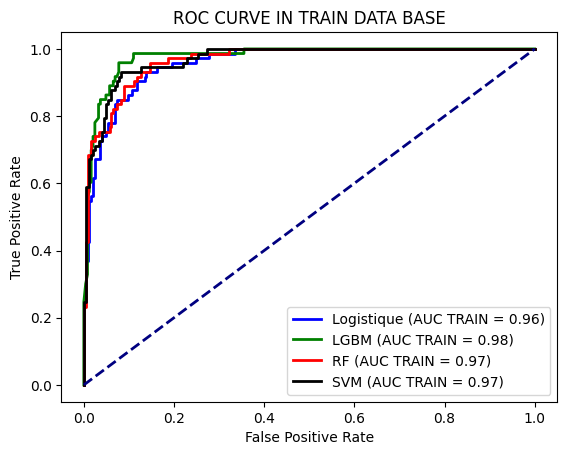

In [ ]:
#LOGISTIQUE : BASE TRAIN
#La ligne trace la courbe de ROC du modèle de Régression Logistique
plt.plot(fpr_logit_train, tpr_logit_train, color='blue', lw=lw, label='Logistique (AUC TRAIN = %0.2f)' % roc_auc_logit_train)

#LGBM : BASE TRAIN
#La ligne trace la courbe de ROC du modèle LGBM
plt.plot(fpr_lgbm_train, tpr_lgbm_train, color='green', lw=lw, label='LGBM (AUC TRAIN = %0.2f)' % roc_auc_lgbm_train)


#RF : BASE TRAIN
#La ligne trace la courbe de ROC du modèle de Random Forest
plt.plot(fpr_rf_train, tpr_rf_train, color='red', lw=lw, label='RF (AUC TRAIN = %0.2f)' % roc_auc_rf_train)


#SVM : BASE TRAIN
#La ligne trace la courbe de ROC du modèle du SVM
plt.plot(fpr_svm_train, tpr_svm_train, color='black', lw=lw, label='SVM (AUC TRAIN = %0.2f)' % roc_auc_svm_train)



#ECHELLE DES GRAPHIQUES
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#TITRE DES GRAPHIQUES
plt.xlabel('False Positive Rate') #titre de l'axe x
plt.ylabel('True Positive Rate') #titre de l'axe y
plt.title('ROC CURVE IN TRAIN DATA BASE') #titre du graphique
plt.legend(loc="lower right") #affichage de la légende

#AFFICHAGE DU GRAPHIQUE
plt.show()

***Conclusion :
le meilleur modèle sur la base train est le Boosting (LGBM)***

## - Courbe de roc sur la base test

<span style="color:red;font-weight: bolder">Question :</span> Tracer les courbes de performance des modèles sur la base **test**.
<em>Précisement, il faut remplacer les trois points (...) par le code Python correspondant</em>.

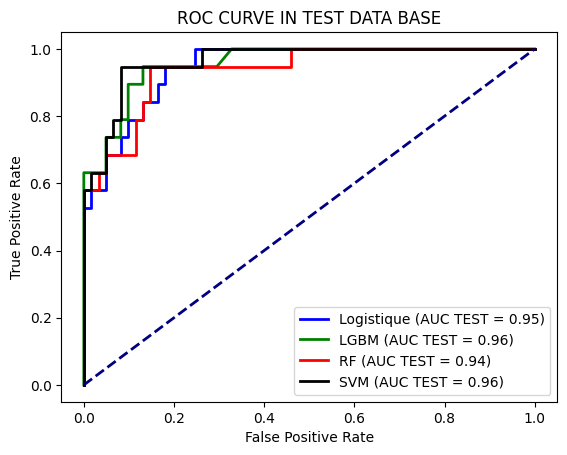

In [ ]:
#LOGISTIQUE : BASE TEST
#La ligne trace la courbe de ROC du modèle de Régression Logistique
plt.plot(fpr_logit_test, tpr_logit_test, color='blue', lw=lw, label='Logistique (AUC TEST = %0.2f)' % roc_auc_logit_test)

#LGBM : BASE TEST
#La ligne trace la courbe de ROC du modèle LGBM
plt.plot(fpr_lgbm_test, tpr_lgbm_test, color='green', lw=lw, label='LGBM (AUC TEST = %0.2f)' % roc_auc_lgbm_test)


#RF : BASE TEST
#La ligne trace la courbe de ROC du modèle de Random Forest
plt.plot(fpr_rf_test, tpr_rf_test, color='red', lw=lw, label='RF (AUC TEST = %0.2f)' % roc_auc_rf_test)


#SVM : BASE TEST
#La ligne trace la courbe de ROC du modèle du SVM
plt.plot(fpr_svm_test, tpr_svm_test, color='black', lw=lw, label='SVM (AUC TEST = %0.2f)' % roc_auc_svm_test)



#ECHELLE DES GRAPHIQUES
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#TITRE DES GRAPHIQUES
plt.xlabel('False Positive Rate') #titre de l'axe x
plt.ylabel('True Positive Rate') #titre de l'axe y
plt.title('ROC CURVE IN TEST DATA BASE') #titre du graphique
plt.legend(loc="lower right") #affichage de la légende

#AFFICHAGE DU GRAPHIQUE
plt.show()

***Conclusion :
les meilleurs modèles sur la base test est le Boosting (LGBM) et le le SVM

## - Choix du meilleur modèle



* **Le meilleur modèle le plus performant est le Boosting (LGBM ) : la valeur AUC sur la Base train = 98% et sur la base test =96%. En conclusion, ce modèle sera utilisé pour les prédictions


In [ ]:
predict_train=db_train.copy()
predict_test=db_test.copy()

NameError: ignored

In [ ]:
predict_train['y_pred_lgbm_train'] = lgbm_modele.predict(db_train[features])
predict_test['y_pred_lgbm_test'] = lgbm_modele.predict(db_test[features])

In [ ]:
predict_train['y_pred_lgbm_train'] .to_excel("lgbmpredictions_sur_train.xlsx")
predict_test['y_pred_lgbm_test'].to_excel("lgbmpredictions_sur_test.xlsx")

In [ ]:
# But du code : l'attribut feature_importances_ du modèle de sklearn rf_modele permet de savoir l'importance des variables.
# En d'autres termes, nous pourrions connaître la contribution de chaque variable dans l'évaluation de la réponse Y (1 : crédit octroyé vs 0 crédit refusé).
feat_importances = pd.Series(rf_modele.feature_importances_, index = features)

# Trier l'importance par ordre décroissant.
feat_importances = feat_importances.sort_values(ascending=True)

# Afficher le graphique.
feat_importances.plot(kind='barh')

### Conclusion

e meilleur modèle le plus performant est le Boosting (LGBM ) : la valeur AUC sur la Base train = 98% et sur la base test =96%. Ainsi il n'était pas nécessaire d'avoir optimisation des modèles en ajoutant de nouvelles variables, en ajustant les paramètres (hyperparamètres) du modèle.
L'objectif d'un modèle d'apprentissage automatique est de généraliser les modèles dans les données d'apprentissage afin que vous puissiez prédire correctement de nouvelles données qui n'ont jamais été présentées au modèle. Le Overfitting se produit lorsqu'un modèle s'ajuste de manière excessive aux données de Train. De cette façon, pour un ensemble de données avec seulement 398 échantillons, nous devons faire très attention à ne pas nous laisser berner par un Overfitting.